In [259]:
import numpy as np
import re
import shapely as sg
from skspatial.measurement import area_signed


In [260]:
# file = "test.dat"
file = "day.dat"
lines = open(file,'r').read().split('\n') 
instructions = [(match.group(1), int(match.group(2))) 
          for l in lines if (match := re.match(r'(.) (.*) .*', l))]
x, y = 0, 0
positions = []
for direction, amount in instructions:
    match direction:
        case 'U': y += amount
        case 'D': y -= amount
        case 'L': x -= amount
        case 'R': x += amount
    positions.append((x, y))

lagoon_poly = sg.Polygon(positions)
# test answer is 38 without edge, 62 with edge
# pick's theorem
# answer is 45159
ans1 = int(lagoon_poly.area+lagoon_poly.length//2+1)
ans1

45159

In [261]:
# shoelace formula, close, but not right
abs(area_signed(positions))

43262.0

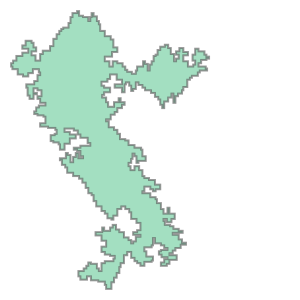

In [262]:
lagoon_poly

Part 2

In [264]:
# file = "test.dat"
file = "day.dat"
lines = open(file,'r').read().split('\n') 
instructions2 = [(match.group(1)[-1], int(match.group(1)[1:6],16)) 
          for l in lines if (match := re.match(r'. .* \((.*)\)', l))]

x, y = 0, 0
positions = [(x, y)]
# 0 means R, 1 means D, 2 means L, and 3 means U
for direction, amount in instructions2:
    match direction:
        case '3': y += amount
        case '1': y -= amount
        case '2': x -= amount
        case '0': x += amount
    positions.append((x, y))

lagoon_poly = sg.Polygon(positions)
# test answer is 952408144115
# pick's theorem
# answer is 134549294799713
int(lagoon_poly.area+lagoon_poly.length//2+1)

134549294799713

In [267]:
#  close to the answer, but not quite
int(abs(area_signed(positions)))

134549208019004

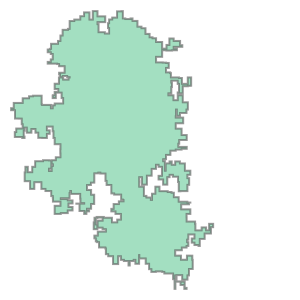

In [265]:
lagoon_poly